In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [16]:
# Load the stock data
df = pd.read_excel(r"C:\Users\Kamal Verma\Downloads\1729258-1613615-Stock_Price_data_set_(1).xlsx", index_col='Date', parse_dates=True)

In [17]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [18]:
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [19]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(1, train_scaled.shape[1]), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
# Train the model
X_train = np.array([train_scaled[i-1:i] for i in range(1, len(train_scaled))])
y_train = np.array([train_scaled[i] for i in range(1, len(train_scaled))])
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
101/101 [==============================] - 1s 961us/step - loss: 0.0860
Epoch 2/100
101/101 [==============================] - 0s 956us/step - loss: 0.0262
Epoch 3/100
101/101 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 4/100
101/101 [==============================] - 0s 902us/step - loss: 0.0250
Epoch 5/100
101/101 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 6/100
101/101 [==============================] - 0s 913us/step - loss: 0.0250
Epoch 7/100
101/101 [==============================] - 0s 913us/step - loss: 0.0250
Epoch 8/100
101/101 [==============================] - 0s 892us/step - loss: 0.0250
Epoch 9/100
101/101 [==============================] - 0s 917us/step - loss: 0.0249
Epoch 10/100
101/101 [==============================] - 0s 940us/step - loss: 0.0249
Epoch 11/100
101/101 [==============================] - 0s 904us/step - loss: 0.0249
Epoch 12/100
101/101 [==============================] - 0s 900us/step - loss: 

In [21]:
# Make predictions
X_test = np.array([test_scaled[i-1:i] for i in range(1, len(test_scaled))])
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [22]:
# Inverse transform the predictions
# y_pred = model.predict(X_test)
y_pred_inv = y_pred.reshape(y_pred.shape[0], y_pred.shape[1])

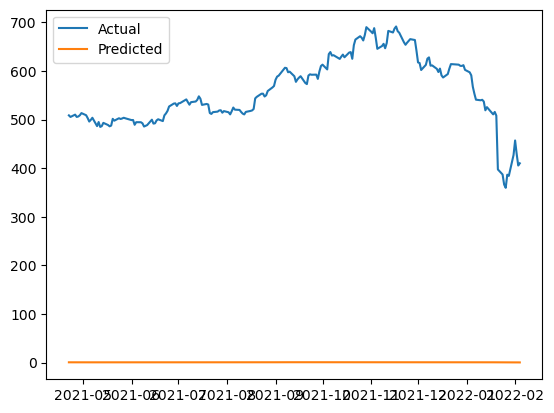

In [24]:
# Plot the predictions against the actual stock prices
import matplotlib.pyplot as plt
plt.plot(test_data.index[1:], test_data['Adj Close'][1:], label='Actual')
plt.plot(test_data.index[1:], y_pred_inv, label='Predicted')
plt.legend()
plt.show()

In [25]:
# Create a new DataFrame with the predictions and the corresponding dates
pred_df = pd.DataFrame({'Date': test_data.index[1:], 'Predicted': y_pred_inv[:,0]})

# Export the DataFrame to a CSV file
pred_df.to_csv('predicted_stock_prices2.csv', index=False)